In \[1\]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings

    warnings.filterwarnings(action='ignore')

In \[2\]:

    # 모델
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier

In \[3\]:

    train=pd.read_csv('Electronics_train.csv')
    test=pd.read_csv('Electronics_testx.csv')

In \[4\]:

    train.head()

Out\[4\]:

|     | Unnamed: 0 | BP   | blue | c_speed | dual | front_c | 4G  | m_int | m_dep | m_wt | ... | px_h | px_w | ram  | sc_h | sc_w | talk_t | 3G  | ts  | wifi | target |
|-----|------------|------|------|---------|------|---------|-----|-------|-------|------|-----|------|------|------|------|------|--------|-----|-----|------|--------|
| 0   | 0          | 842  | 0    | 2.2     | 0    | 1       | 0   | 7     | 0.6   | 188  | ... | 20   | 756  | 2549 | 9    | 7    | 19     | 0   | 0   | 1    | 1      |
| 1   | 1          | 1021 | 1    | 0.5     | 1    | 0       | 1   | 53    | 0.7   | 136  | ... | 905  | 1988 | 2631 | 17   | 3    | 7      | 1   | 1   | 0    | 2      |
| 2   | 2          | 563  | 1    | 0.5     | 1    | 2       | 1   | 41    | 0.9   | 145  | ... | 1263 | 1716 | 2603 | 11   | 2    | 9      | 1   | 1   | 0    | 2      |
| 3   | 3          | 615  | 1    | 2.5     | 0    | 0       | 0   | 10    | 0.8   | 131  | ... | 1216 | 1786 | 2769 | 16   | 8    | 11     | 1   | 0   | 0    | 2      |
| 4   | 4          | 1821 | 1    | 1.2     | 0    | 13      | 1   | 44    | 0.6   | 141  | ... | 1208 | 1212 | 1411 | 8    | 2    | 15     | 1   | 1   | 0    | 1      |

5 rows × 22 columns

In \[5\]:

    train.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1500 entries, 0 to 1499
    Data columns (total 22 columns):
     #   Column      Non-Null Count  Dtype  
    ---  ------      --------------  -----  
     0   Unnamed: 0  1500 non-null   int64  
     1   BP          1500 non-null   int64  
     2   blue        1500 non-null   int64  
     3   c_speed     1500 non-null   float64
     4   dual        1500 non-null   int64  
     5   front_c     1500 non-null   int64  
     6   4G          1500 non-null   int64  
     7   m_int       1500 non-null   int64  
     8   m_dep       1500 non-null   float64
     9   m_wt        1500 non-null   int64  
     10  n_cores     1500 non-null   int64  
     11  prim_c      1500 non-null   int64  
     12  px_h        1500 non-null   int64  
     13  px_w        1500 non-null   int64  
     14  ram         1500 non-null   int64  
     15  sc_h        1500 non-null   int64  
     16  sc_w        1500 non-null   int64  
     17  talk_t      1500 non-null   int64  
     18  3G          1500 non-null   int64  
     19  ts          1500 non-null   int64  
     20  wifi        1500 non-null   int64  
     21  target      1500 non-null   int64  
    dtypes: float64(2), int64(20)
    memory usage: 257.9 KB

-   관측

1.  결측치가 없습니다

In \[6\]:

    #drop columns
    train.drop(['Unnamed: 0'], axis=1, inplace=True)
    test.drop(['Unnamed: 0'], axis=1, inplace=True)

In \[7\]:

    train.columns

Out\[7\]:

    Index(['BP', 'blue', 'c_speed', 'dual', 'front_c', '4G', 'm_int', 'm_dep',
           'm_wt', 'n_cores', 'prim_c', 'px_h', 'px_w', 'ram', 'sc_h', 'sc_w',
           'talk_t', '3G', 'ts', 'wifi', 'target'],
          dtype='object')

In \[8\]:

    # 이상치 확인 및 제거하기
    #cut_point = train[]"trip_duration_min"].quantile(0.99)
    #df_cut=df[df['trip_duration_min'] < cut_point]

In \[9\]:

    # 타겟 변 간 분포 차이 확인하기
    train['target'].value_counts()

Out\[9\]:

    3    379
    0    375
    2    374
    1    372
    Name: target, dtype: int64

In \[10\]:

    # 상관계수의 파악
    corr=train.corr()
    %matplotlib inline
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr[corr.abs()>0.05], annot=True)

Out\[10\]:

    <AxesSubplot:>

![](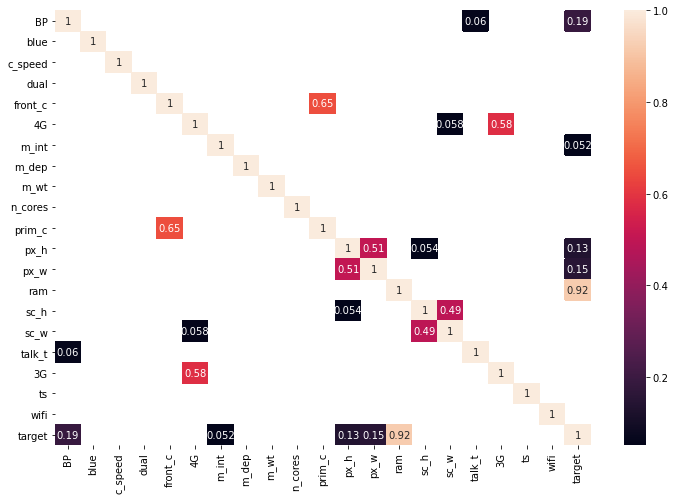%0A)

-   결과

1.  특히 target이랑 높은 상관관계를 보이는 RAM의 경우 이상치를 제거하는
    것이?
2.  BP, pixel reoludtion height, pixel resolution width 모두 어느 정도
    상관관계를 보인다

In \[11\]:

    sns.displot(train, x="ram")

Out\[11\]:

    <seaborn.axisgrid.FacetGrid at 0x1a041833a30>

![](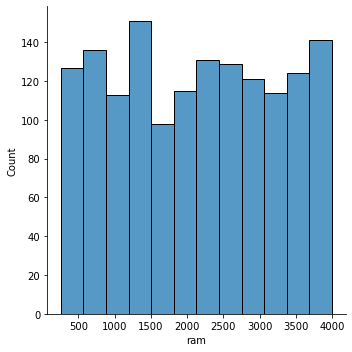%0A)

-   쟁점

1.  PCA 사용 미사용 비교 & component 값은 어느 정도로
2.  ensemble 사용과 비교
3.  어떤 평가지표를 사용할 것인가
4.  불균형 데이터 처리 \> 데이터가 잘 정제되어 있음

In \[12\]:

    X_train = train.drop('target', axis=1)
    y_train = train['target']

In \[13\]:

    # 몇가지 피쳐만
    X_train_sel = X_train[['BP','m_int','px_h','px_w','ram']]
    X_train_sel

Out\[13\]:

|      | BP   | m_int | px_h | px_w | ram  |
|------|------|-------|------|------|------|
| 0    | 842  | 7     | 20   | 756  | 2549 |
| 1    | 1021 | 53    | 905  | 1988 | 2631 |
| 2    | 563  | 41    | 1263 | 1716 | 2603 |
| 3    | 615  | 10    | 1216 | 1786 | 2769 |
| 4    | 1821 | 44    | 1208 | 1212 | 1411 |
| ...  | ...  | ...   | ...  | ...  | ...  |
| 1495 | 1472 | 20    | 443  | 892  | 797  |
| 1496 | 1868 | 40    | 576  | 884  | 298  |
| 1497 | 1375 | 20    | 596  | 679  | 3847 |
| 1498 | 881  | 64    | 115  | 636  | 2110 |
| 1499 | 1742 | 43    | 356  | 1407 | 1921 |

1500 rows × 5 columns

In \[14\]:

    from sklearn.model_selection import train_test_split

In \[15\]:

    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

In \[16\]:

    X_train_sel, X_val_sel, y_train_sel, y_val_sel= train_test_split(X_train_sel,train['target'],test_size = 0.2,random_state = 42)

In \[17\]:

    from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix

In \[18\]:

    def get_clf_eval(y_test,pred):
        confusion = confusion_matrix(y_test,pred)
        accuracy = accuracy_score(y_test,pred)
        precision = precision_score(y_test,pred,average='macro')
        recall = recall_score(y_test,pred,average='macro')
        f1 = f1_score(y_test,pred,average='macro')
        
        print('오차행렬')
        print(confusion)
        print('정확도:',accuracy)
        print('정밀도:',precision)
        print('재현율:',recall)
        print('F1:',f1)

In \[19\]:

    models ={
        'DecisionTreeClassifier':DecisionTreeClassifier(random_state=0),
        'RandomForestClassifier':RandomForestClassifier(random_state=0),
        'LogisticRegression': LogisticRegression(random_state=0),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'SVM': SVC(random_state=0),
        'AdaBoostClassifier': AdaBoostClassifier(random_state=0),
        'XGBoostClassifier': XGBClassifier(random_state=0),
        'LGBMClassifier': LGBMClassifier(random_state=0)
    }
    accuracy = []

In \[20\]:

    for model in models:
        clf = models[model]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_val)
        
        print('\n-------------', model, '---------------')
        
        get_clf_eval(y_val,pred)
        
        accuracy.append(accuracy_score(y_val,pred))

    ------------- DecisionTreeClassifier ---------------
    오차행렬
    [[77  4  0  0]
     [ 8 66  8  0]
     [ 0  8 49 12]
     [ 0  1  9 58]]
    정확도: 0.8333333333333334
    정밀도: 0.8280802654778828
    재현율: 0.8296453591844813
    F1: 0.8285230639604658

    ------------- RandomForestClassifier ---------------
    오차행렬
    [[79  2  0  0]
     [ 8 60 14  0]
     [ 0  7 52 10]
     [ 0  0  5 63]]
    정확도: 0.8466666666666667
    정밀도: 0.8432548148075296
    재현율: 0.8467774339223928
    F1: 0.842913085341224

    ------------- LogisticRegression ---------------
    오차행렬
    [[65 16  0  0]
     [13 41 23  5]
     [ 1 13 28 27]
     [ 0  2 16 50]]
    정확도: 0.6133333333333333
    정밀도: 0.6049739499732991
    재현율: 0.6108900887247009
    F1: 0.605849726254138

    ------------- KNeighborsClassifier ---------------
    오차행렬
    [[79  2  0  0]
     [ 4 78  0  0]
     [ 0  4 61  4]
     [ 0  0  3 65]]
    정확도: 0.9433333333333334
    정밀도: 0.9438831607485845
    재현율: 0.9416171195315249
    F1: 0.9423430032156693

    ------------- SVM ---------------
    오차행렬
    [[81  0  0  0]
     [ 1 80  1  0]
     [ 0  4 60  5]
     [ 0  0  1 67]]
    정확도: 0.96
    정밀도: 0.9596208303672897
    재현율: 0.957617272783981
    F1: 0.957723460963899

    ------------- AdaBoostClassifier ---------------
    오차행렬
    [[11 70  0  0]
     [ 1 70 11  0]
     [ 0  9 58  2]
     [ 0  0 52 16]]
    정확도: 0.5166666666666667
    정밀도: 0.6886732640622206
    재현율: 0.5163337083782886
    F1: 0.45630977122271
    [21:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

    ------------- XGBoostClassifier ---------------
    오차행렬
    [[78  3  0  0]
     [ 6 73  3  0]
     [ 0  6 58  5]
     [ 0  0  3 65]]
    정확도: 0.9133333333333333
    정밀도: 0.9134091898954704
    재현율: 0.9124172321220229
    F1: 0.912476971132159

    ------------- LGBMClassifier ---------------
    오차행렬
    [[79  2  0  0]
     [ 7 68  7  0]
     [ 0  6 60  3]
     [ 0  0  6 62]]
    정확도: 0.8966666666666666
    정밀도: 0.8972763638333465
    재현율: 0.8964767144829732
    F1: 0.8960671319262259

In \[21\]:

    #피쳐 선택했을 경우
    for model in models:
        clf = models[model]
        clf.fit(X_train_sel,y_train_sel)
        pred = clf.predict(X_val_sel)
        
        print('\n-------------', model, '---------------')
        
        get_clf_eval(y_val_sel,pred)
        
        accuracy.append(accuracy_score(y_val_sel,pred))

    # 큰 차이가 없고 오히려 정확도 측면에서 좋지 않은 것으로 예상이 됨
    # 랜덤 포레스트는 예외

    ------------- DecisionTreeClassifier ---------------
    오차행렬
    [[75  6  0  0]
     [ 7 70  5  0]
     [ 0  7 49 13]
     [ 0  0 10 58]]
    정확도: 0.84
    정밀도: 0.8351335121920178
    재현율: 0.835667641629528
    F1: 0.835026181655433

    ------------- RandomForestClassifier ---------------
    오차행렬
    [[80  1  0  0]
     [ 3 78  1  0]
     [ 0  7 56  6]
     [ 0  0  3 65]]
    정확도: 0.93
    정밀도: 0.9299146142381514
    재현율: 0.9265875972556259
    F1: 0.9269125093734266

    ------------- LogisticRegression ---------------
    오차행렬
    [[58 20  2  1]
     [17 32 14 19]
     [ 2 16 14 37]
     [ 0  4 14 50]]
    정확도: 0.5133333333333333
    정밀도: 0.495790683874796
    재현율: 0.5111214883816926
    F1: 0.49224445320558236

    ------------- KNeighborsClassifier ---------------
    오차행렬
    [[78  3  0  0]
     [ 4 78  0  0]
     [ 0  4 61  4]
     [ 0  0  4 64]]
    정확도: 0.9366666666666666
    정밀도: 0.9371261450171062
    재현율: 0.9348542291902031
    F1: 0.9357027957582844

    ------------- SVM ---------------
    오차행렬
    [[81  0  0  0]
     [ 2 79  1  0]
     [ 0  3 60  6]
     [ 0  0  1 67]]
    정확도: 0.9566666666666667
    정밀도: 0.9562171008165316
    재현율: 0.9545684922961761
    F1: 0.9544011641188362

    ------------- AdaBoostClassifier ---------------
    오차행렬
    [[16 65  0  0]
     [ 0 76  6  0]
     [ 0 12 56  1]
     [ 0  0 53 15]]
    정확도: 0.5433333333333333
    정밀도: 0.7302971369707303
    재현율: 0.5391356426707206
    F1: 0.4856359817928907
    [21:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

    ------------- XGBoostClassifier ---------------
    오차행렬
    [[78  3  0  0]
     [ 4 76  2  0]
     [ 0  7 57  5]
     [ 0  0  2 66]]
    정확도: 0.9233333333333333
    정밀도: 0.9247360341811524
    재현율: 0.9216168557678757
    F1: 0.922095121044673

    ------------- LGBMClassifier ---------------
    오차행렬
    [[80  1  0  0]
     [ 8 72  2  0]
     [ 0  7 58  4]
     [ 0  0  6 62]]
    정확도: 0.9066666666666666
    정밀도: 0.9068181818181819
    재현율: 0.9045118793756849
    F1: 0.9050667111516709

In \[22\]:

    from sklearn.model_selection import GridSearchCV

In \[23\]:

    svc = SVC(random_state=0)
    params = {'C':[0.001,0.01,0.1,1,10,20,50],
             'kernel': ['rbf']}
    svc_grid = GridSearchCV(svc,param_grid=params,cv=5)
    svc_grid.fit(X_train,y_train)

    print('최적 하이퍼 파라미터:', svc_grid.best_params_)
    print('평균 정확도:{}'.format(svc_grid.best_score_))

    최적 하이퍼 파라미터: {'C': 20, 'kernel': 'rbf'}
    평균 정확도:0.9616666666666667

In \[24\]:

    knn = KNeighborsClassifier()
    params = [{'n_neighbors': range(3,10)}]

    knn_grid = GridSearchCV(knn,param_grid=params,cv=5,n_jobs=-1)
    knn_grid.fit(X_train,y_train)

    print('최적 하이퍼 파라미터:', knn_grid.best_params_)
    print('평균 정확도:{}'.format(knn_grid.best_score_))

    최적 하이퍼 파라미터: {'n_neighbors': 8}
    평균 정확도:0.9291666666666666

In \[25\]:

    # 랜덤 포레스트 하이퍼 파라미터 튜닝
    rf = RandomForestClassifier(random_state=0)

    params = { 'n_estimators' : [10, 30, 50],
               'max_depth' : [6, 8, 10, 12],
               'min_samples_leaf' : [8, 12, 18],
               'min_samples_split' : [8, 16, 20]
                }

    rf_grid = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
    rf_grid.fit(X_train, y_train)

    print('최적 하이퍼 파라미터: ', rf_grid.best_params_)
    print('최고 예측 정확도: {:.4f}'.format(rf_grid.best_score_))

    최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 50}
    최고 예측 정확도: 0.8475

In \[26\]:

    # Hard Voting
    vo_clf_hard = VotingClassifier(estimators=[('SVM',svc_grid.best_estimator_),
                                              ('KNN',knn_grid.best_estimator_),
                                              ('RF',rf_grid.best_estimator_)],
                                  voting='hard')
    vo_clf_hard.fit(X_train,y_train)
    pred_vo_hard = vo_clf_hard.predict(X_val)
    print(get_clf_eval(pred_vo_hard,pred))

    오차행렬
    [[81  2  0  0]
     [ 7 74  1  0]
     [ 0  4 59  1]
     [ 0  0  6 65]]
    정확도: 0.93
    정밀도: 0.931060606060606
    재현율: 0.9289276491486386
    F1: 0.9293865212868926
    None

In \[27\]:

    pred_vo_hard_test = vo_clf_hard.predict(test)

In \[28\]:

    # 랜덤 포레스트는 성능이 많이 나아졌기 때문에 진행하였으나 큰 변화는 없음
    vo_clf_hard_sel = VotingClassifier(estimators=[('SVM',svc_grid.best_estimator_),
                                              ('KNN',knn_grid.best_estimator_),
                                              ('RF',rf_grid.best_estimator_)],
                                  voting='hard')
    vo_clf_hard_sel.fit(X_train_sel,y_train_sel)
    pred_vo_hard_sel = vo_clf_hard_sel.predict(X_val_sel)
    print(get_clf_eval(pred_vo_hard_sel,pred))

    오차행렬
    [[80  1  0  0]
     [ 8 75  1  0]
     [ 0  4 60  1]
     [ 0  0  5 65]]
    정확도: 0.9333333333333333
    정밀도: 0.9351325757575758
    재현율: 0.9330399538732872
    F1: 0.9333231489409907
    None

In \[29\]:

    X_test_sel = test[['BP','m_int','px_h','px_w','ram']]

    pred_vo_hard_test_sel = vo_clf_hard_sel.predict(X_test_sel)

In \[30\]:

    # GBM Grid Search
    # gb_clf = GradientBoostingClassifier(random_state=10)

    # prarams = {
    #     'n_estimator': [100,150,300],
    #     'learning_rate':[0.01, 0.05,0.1]
    # }
    # start_time = time.time()
    # grid = GridSeachCV(gb_clf,param_grid=params,cv=3,verbose=1,n_jobs=-1)
    # grid.fit(X_train,y_train)

In \[31\]:

    xgb_clf = XGBClassifier(random_state=10)

    param_test1 = {
     'max_depth':range(3,10,3),
     'min_child_weight':range(1,6,2)
    }

    xgb_grid = GridSearchCV(estimator = xgb_clf, param_grid = param_test1,
                                                      scoring='accuracy',n_jobs=-1,cv=3)

    xgb_grid.fit(X_train,y_train)   
    print('최적 하이퍼 파라미터: ', xgb_grid.best_params_)
    print('최고 예측 정확도: {:.4f}'.format(xgb_grid.best_score_))

    [21:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    최적 하이퍼 파라미터:  {'max_depth': 3, 'min_child_weight': 1}
    최고 예측 정확도: 0.8983

In \[ \]:

     

# \[Stacking\]<a href="#%5BStacking%5D" class="anchor-link">¶</a>

In \[39\]:

    import numpy as np

In \[40\]:

    X_train = train.drop('target', axis=1)
    y_train = train['target']

    xtraining,xvalid,ytraining,yvalid = train_test_split(X_train,y_train,test_size=0.5)

In \[41\]:

    model1 = svc_grid.best_estimator_
    model2 = knn_grid.best_estimator_
    model3 = rf_grid.best_estimator_

In \[42\]:

    model1.fit(xtraining,ytraining)
    model2.fit(xtraining,ytraining)
    model3.fit(xtraining,ytraining)

    preds1 = model1.predict(xvalid)
    preds2 = model2.predict(xvalid)
    preds3 = model3.predict(xvalid)

    test_preds1 = model1.predict(test)
    test_preds2 = model2.predict(test)
    test_preds3 = model3.predict(test)

    train_stack = np.column_stack((preds1,preds2,preds3))
    test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

In \[44\]:

    final_model = RandomForestClassifier()

In \[45\]:

    final_model.fit(train_stack,yvalid)

Out\[45\]:

    RandomForestClassifier()

In \[48\]:

    final_predictions_stacking = final_model.predict(test_stack)

# \[제출\]<a href="#%5B제출%5D" class="anchor-link">¶</a>

In \[32\]:

    # Hard Voting
    y_pred = pd.DataFrame(pred_vo_hard_test)
    y_pred.columns =['target']
    y_pred['index'] = y_pred.index
    y_pred = y_pred[['index', 'target']]

    y_pred.to_csv("Test_Pred_Vot_Hard.csv", header=True, index=False)
    # 정확도: 0.926

In \[33\]:

    # Hard Voting with selection
    y_pred_sel = pd.DataFrame(pred_vo_hard_test_sel)
    y_pred_sel.columns =['target']
    y_pred_sel['index'] = y_pred_sel.index
    y_pred_sel = y_pred_sel[['index', 'target']]

    y_pred_sel.to_csv("Test_Sel_Pred_Vot_Hard.csv", header=True, index=False)
    # 정확도: 0.922

In \[49\]:

    # Stacking
    y_pred_stack = pd.DataFrame(final_predictions_stacking)
    y_pred_stack.columns =['target']
    y_pred_stack['index'] = y_pred_stack.index
    y_pred_stack = y_pred_stack[['index', 'target']]

    y_pred_stack.to_csv("Test_Pred_Stack.csv", header=True, index=False)
    # 정확도 0.934

In \[34\]:

    # submit = pd.read_csv("LGBM.csv")
    # submit